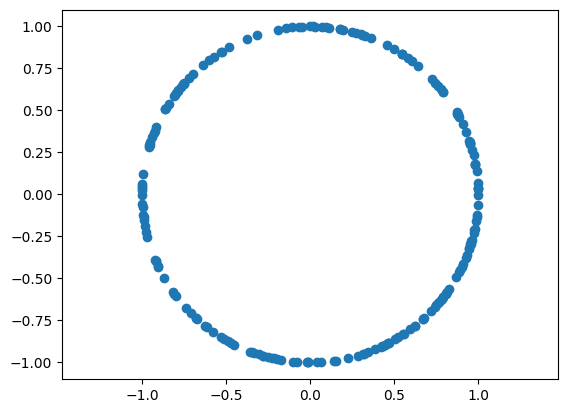

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

def circle(theta, r=5.):
    return r * jax.numpy.cos(theta), r * jax.numpy.sin(theta)

def plot_circle(r, theta):
    x, y = circle(theta, r)
    plt.scatter(x, y)
    plt.axis('equal')
    plt.show()
    
def plot_whole_cirle(r):
    theta = jax.numpy.linspace(0, 2 * jax.numpy.pi, 100)
    plot_circle(r, theta)
    

key = jax.random.PRNGKey(0)
distributed_theta = jax.random.uniform(key, (100, 2), minval=0, maxval=2 * jax.numpy.pi)
plot_circle(1, distributed_theta)


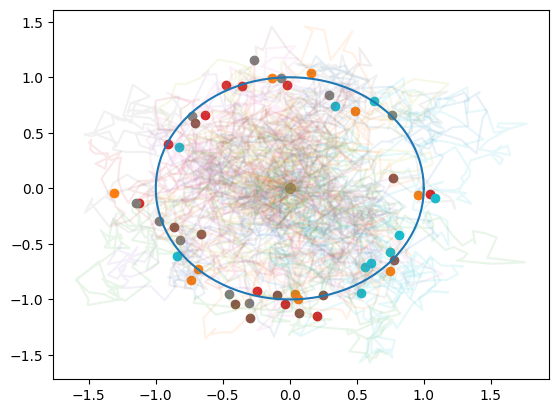

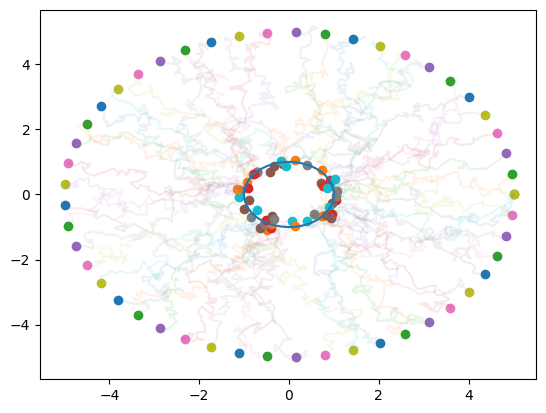

In [2]:
from experiments.plotting import load_checkpoint_w_batch_stats
from src.sdes import sde_utils, sde_bm

path = "../../checkpoints/bm/circle_uniformly_distributed_endpt_r_1.0"

bm = sde_bm.brownian_motion(T=1., N=100, dim=2)

trained_score, restored = load_checkpoint_w_batch_stats(path)
ts = bm.time_grid
num_trajectories = 50

x0 = jax.vmap(circle)(jnp.linspace(0, 2*jnp.pi, num_trajectories))
x1 = jnp.zeros((num_trajectories, 2))

keys = jax.random.split(key, num_trajectories)

trajs_from_centre = jax.vmap(sde_utils.conditioned, in_axes=(0, 0, None, None))(keys, x1, bm, trained_score)

trajs_from_circ = jax.vmap(sde_utils.conditioned, in_axes=(0, 0, None, None))(keys, x0, bm, trained_score)

thetas_100 = jax.numpy.linspace(0, 2 * jax.numpy.pi, 100)
x, y = circle(thetas_100, 1.0)

for traj in trajs_from_centre:
    plt.plot(traj[:, 0], traj[:, 1], alpha=0.1)
    plt.scatter(traj[0, 0], traj[0, 1])
    plt.scatter(traj[-1, 0], traj[-1, 1])
plt.plot(x, y)
plt.show()

for traj in trajs_from_circ:
    plt.plot(traj[:, 0], traj[:, 1], alpha=0.1)
    plt.scatter(traj[0, 0], traj[0, 1])
    plt.scatter(traj[-1, 0], traj[-1, 1])
plt.plot(x, y)
plt.show()

In [3]:
# from experiments.plotting import load_checkpoint_wo_batch_stats, load_checkpoint_w_batch_stats
# from src.sdes import sde_utils, sde_bm
# 
# path_1 = "../../checkpoints/bm/circle_uniformly_distributed_endpt_r_1.0_1_epoch"
# 
# trained_score_1, restored = load_checkpoint_w_batch_stats(path_1)
# drift, diffusion = sde_bm.vector_fields()
# ts = sde_utils.time.grid(0, 1., 100)
# num_trajectories = 50
# 
# # x0 = (0., -0.)
# 
# x0 = jax.vmap(circle)(jnp.linspace(0, 2*jnp.pi, num_trajectories))
# x1 = jnp.zeros((num_trajectories, 2))
# 
# keys = jax.random.split(key, num_trajectories)
# 
# trajs_from_centre = jax.vmap(sde_utils.conditioned, in_axes=(0, None, 0, None, None, None))(keys, ts, x1, trained_score_1, drift, diffusion)
# 
# trajs_from_circ = jax.vmap(sde_utils.conditioned, in_axes=(0, None, 0, None, None, None))(keys, ts, x0, trained_score_1, drift, diffusion)
# 
# thetas_100 = jax.numpy.linspace(0, 2 * jax.numpy.pi, 100)
# x, y = circle(thetas_100, 1.0)
# 
# for traj in trajs_from_centre:
#     plt.plot(traj[:, 0], traj[:, 1], alpha=0.1)
#     plt.scatter(traj[0, 0], traj[0, 1])
#     plt.scatter(traj[-1, 0], traj[-1, 1])
# plt.plot(x, y)
# plt.show()
# 
# for traj in trajs_from_circ:
#     plt.plot(traj[:, 0], traj[:, 1], alpha=0.1)
#     plt.scatter(traj[0, 0], traj[0, 1])
#     plt.scatter(traj[-1, 0], traj[-1, 1])
# plt.plot(x, y)
# plt.show()

In [4]:
from experiments.plotting import load_checkpoint_w_batch_stats
from src.sdes import sde_utils, sde_bm

from tueplots import bundles, axes, cycler, figsizes
from tueplots.constants.color import palettes

bundle = bundles.aistats2023()
plt.rcParams.update(bundle)
axes.lines()
plt.rcParams.update(cycler.cycler(color=palettes.paultol_muted))
cyc = plt.rcParams['axes.prop_cycle']
plt.rcParams.update(figsizes.aistats2022_full(nrows=1, ncols=2))

path_r3 = "../../checkpoints/bm/circle_uniformly_distributed_endpt_r_3.0"

trained_score_r3, restored_r3 = load_checkpoint_w_batch_stats(path_r3)
num_trajectories = 50


x0 = jax.vmap(circle)(jnp.linspace(0, 2*jnp.pi, num_trajectories))
x1 = jnp.zeros((num_trajectories, 2))

keys = jax.random.split(key, num_trajectories)

trajs_from_centre = jax.vmap(sde_utils.conditioned, in_axes=(0, None, 0, None, None, None))(keys, x1, bm, trained_score_r3)

trajs_from_circ = jax.vmap(sde_utils.conditioned, in_axes=(0, None, 0, None, None, None))(keys, x0, bm, trained_score_r3)

thetas_50 = jax.numpy.linspace(0, 2 * jax.numpy.pi, 20)
x, y = circle(thetas_50, 3.0)

fig, axs = plt.subplot_mosaic([["centre", "circ"]], sharex=True, sharey=True)


scatter_kwargs={"s":10}
plot_kwargs={"alpha": 0.5, "linewidth": 0.5}

for i, traj in enumerate(trajs_from_centre):
    c="C0"
    axs["centre"].plot(traj[:, 0], traj[:, 1], **plot_kwargs, color=c)
    axs["centre"].scatter(traj[0, 0], traj[0, 1], **scatter_kwargs, color=c)
    axs["centre"].scatter(traj[-1, 0], traj[-1, 1], **scatter_kwargs, color=c)
axs["centre"].plot(x, y, color="grey", **plot_kwargs)

for traj in trajs_from_circ:
    c="C1"
    axs["circ"].plot(traj[:, 0], traj[:, 1], **plot_kwargs, color=c)
    axs["circ"].scatter(traj[0, 0], traj[0, 1], **scatter_kwargs, color=c)
    axs["circ"].scatter(traj[-1, 0], traj[-1, 1], **scatter_kwargs, color=c)
axs["circ"].plot(x, y, color="grey", alpha=0.5, linewidth=0.7)

plt.savefig("bm_endpt_distribution_r_3.pdf")
plt.show()


FileNotFoundError: Checkpoint at ../../checkpoints/bm/circle_uniformly_distributed_endpt_r_3.0 not found.

In [ ]:
print(restored_r3['training'])